# Analysis of the Human Development Index (HDI)
### Assignment 01 – Statistical Interpretation and Exploratory Data Analysis  
**Course:** Concepts and Technologies of AI (5CS037)  
**Student:** Basanta Bomjan
**Institution:** Herald College, Kathmandu  


Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



UPLOADING FILE AND LOAD DATASET

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Human_Development_Index_Dataset.csv to Human_Development_Index_Dataset.csv


In [3]:
# LOADING dataset with encoding fix
hdi = pd.read_csv('Human_Development_Index_Dataset.csv', encoding='latin1')
#PREVIEW DATASET
hdi.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


BASIC DATA CHECK

In [4]:
hdi.shape



(6798, 30)

In [5]:
hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 6798 non-null   int64  
 1   iso3                       6798 non-null   object 
 2   country                    6798 non-null   object 
 3   year                       6798 non-null   int64  
 4   hdi                        6171 non-null   float64
 5   life_expectancy            6798 non-null   float64
 6   pop_millions               6798 non-null   float64
 7   hdi_f                      5014 non-null   float64
 8   hdi_m                      5014 non-null   float64
 9   life_expec_f               6798 non-null   float64
 10  life_expec_m               6798 non-null   float64
 11  expec_yr_school            6550 non-null   float64
 12  expec_yr_school_f          6270 non-null   float64
 13  expec_yr_school_m          6270 non-null   float

# Problem 1


#Basic Data Exploration & Trend Visualization

#Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)

#Extract Latest Year:

Identify unique years in the dataset

In [6]:
hdi['year'].unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

**Filtering the dataset to include only observations from the year 2022**

In [7]:
hdi_2022_df = hdi[hdi['year'] == 2022]
hdi_2022_df = hdi_2022_df.reset_index(drop=True)

hdi_2022_df.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
1,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
2,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
3,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
4,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
5,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
6,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
7,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
8,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
9,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


#Data Exploration:

Displaying the first 10 rows of the 2022 dataset.

In [8]:
hdi_2022_df.head(10)




,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
1,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
2,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
3,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
4,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
5,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
6,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
7,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
8,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
9,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


Count the number of rows and columns.

In [9]:
hdi_2022_df.shape


(206, 30)

List all column names and their data types.

In [10]:
hdi_2022_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64

# Missing Values & Data Cleaning:

**Checking for missing values in each column and report total counts.**

In [11]:
hdi_2022_df.isnull().sum()


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


**Data cleaning**

In [12]:
# Converting  numeric columns stored as text
hdi_2022_df['hdi'] = pd.to_numeric(hdi_2022_df['hdi'], errors='coerce')
hdi_2022_df['gross_inc_percap'] = pd.to_numeric(hdi_2022_df['gross_inc_percap'], errors='coerce')


# Removing duplicates
hdi_2022_df = hdi_2022_df.drop_duplicates()

# Dropping the rows with missing HDI
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])


#Basic Statistics:

**Computing the mean, median, and standard deviation of HDI for the year 2022.**

In [13]:
hdi_2022_df['hdi'].mean(), hdi_2022_df['hdi'].median(), hdi_2022_df['hdi'].std()


(np.float64(0.7228872549019609), 0.7395, 0.15302880386427825)

**country with the highest HDI in 2022.**

In [14]:

hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]


,169
Unnamed: 0,5610
iso3,CHE
country,Switzerland
year,2022
hdi,0.967
life_expectancy,84.255
pop_millions,8.740472
hdi_f,0.949369
hdi_m,0.977383
life_expec_f,85.932


**country with the lowest HDI in 2022.**

In [15]:
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]


,161
Unnamed: 0,5346
iso3,SOM
country,Somalia
year,2022
hdi,0.38
life_expectancy,56.107
pop_millions,17.597511
hdi_f,0.327083
hdi_m,0.425211
life_expec_f,58.233


#Filtering and Sorting:

**Filter HDI > 0.800**

In [16]:
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]


**Sort by GNI per capita (descending)**

In [17]:
high_hdi_sorted = high_hdi_df.sort_values(by='gross_inc_percap', ascending=False)


**Display the top 10 countries.**

In [18]:
high_hdi_sorted.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
100,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
142,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
157,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
81,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
102,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
184,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
169,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
130,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
186,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
74,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


#Adding HDI Category Column:

**Creating classification function**

In [19]:
def hdi_category(hdi):
    if hdi < 0.550:
        return 'Low'
    elif hdi < 0.700:
        return 'Medium'
    elif hdi < 0.800:
        return 'High'
    else:
        return 'Very High'

hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(hdi_category)


**Verifying categories**

In [20]:
hdi_2022_df['HDI Category'].value_counts()


,count
HDI Category,
Very High,71
High,54
Medium,44
Low,35


Save the final dataframe as HDI category added.csv

In [21]:
hdi_2022_df.to_csv('HDI_category_added.csv', index=False)


#Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)

#Data Extraction and Saving:

**FILTERING YEARS 2020–2022**

In [22]:
hdi_2020_2022_df = hdi[hdi['year'].isin([2020, 2021, 2022])]
hdi_2020_2022_df = hdi_2020_2022_df.dropna(subset=['hdi', 'country', 'year'])
hdi_2020_2022_df = hdi_2020_2022_df.drop_duplicates()


**Save the filtered dataset as HDI problem1B.csv.**

In [23]:
hdi_2020_2022_df.to_csv('HDI_problem1B.csv', index=False)


#Data Cleaning:

**Checking missing values for essential columns
– hdi
– country
– year**

In [24]:
hdi_2020_2022_df[['country', 'year', 'hdi']].isnull().sum()


,0
country,0
year,0
hdi,0


**Replacing special symbols like “–” with NaN**

In [25]:
hdi_2020_2022_df = hdi_2020_2022_df.replace("–", np.nan)


**Converting numeric columns stored as text**

In [26]:
hdi_2020_2022_df['hdi'] = pd.to_numeric(hdi_2020_2022_df['hdi'], errors='coerce')


Removing duplicate rows

In [27]:
hdi_2020_2022_df = hdi_2020_2022_df.drop_duplicates()


**Handle missing HDI values**

In [28]:
hdi_2020_2022_df = hdi_2020_2022_df.dropna(subset=['hdi'])


**Line Chart — HDI Trend (Country-Level) of 5 countries**

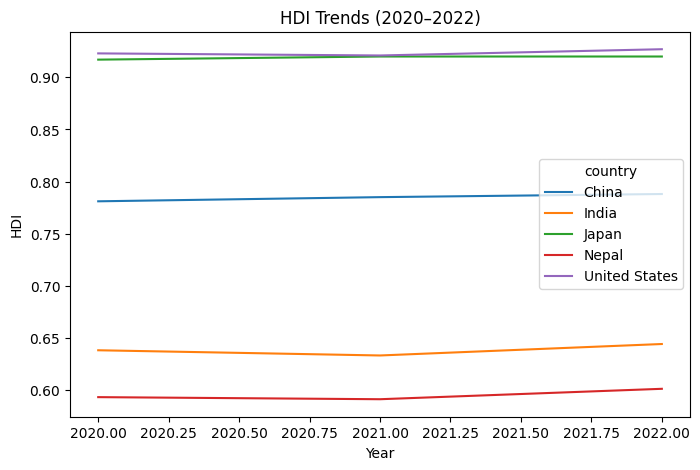

In [29]:
countries = ['Nepal', 'India', 'China', 'United States', 'Japan']
subset = hdi_2020_2022_df[hdi_2020_2022_df['country'].isin(countries)]

plt.figure(figsize=(8,5))
sns.lineplot(data=subset, x='year', y='hdi', hue='country')
plt.title('HDI Trends (2020–2022)')
plt.xlabel('Year')
plt.ylabel('HDI')
plt.show()


**Bar Chart: Average HDI by Region (2020–2022)**

**Box Plot: HDI Distribution for 2020, 2021, and 2022**

**Filtering the dataset for the years 2020, 2021, and 2022.**

In [30]:
hdi_2020_2022_df = hdi[hdi['year'].isin([2020, 2021, 2022])]


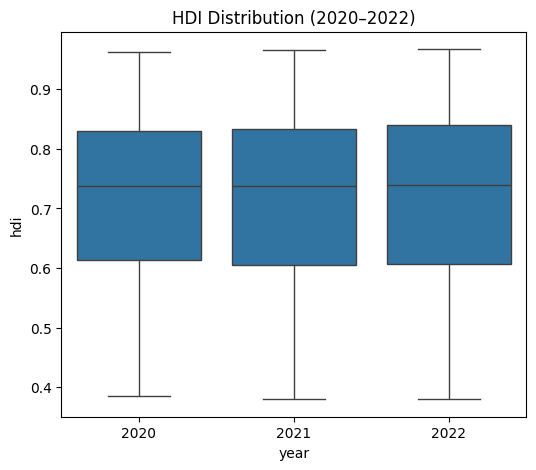

In [31]:
plt.figure(figsize=(6,5))
sns.boxplot(data=hdi_2020_2022_df, x='year', y='hdi')
plt.title('HDI Distribution (2020–2022)')
plt.show()


**Scatter Plot: HDI vs. GNI per Capita**

**Checking if the dataset contains a column for GNI per Capita.**

In [32]:
print(hdi.columns)


Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons'],
      dtype='object')


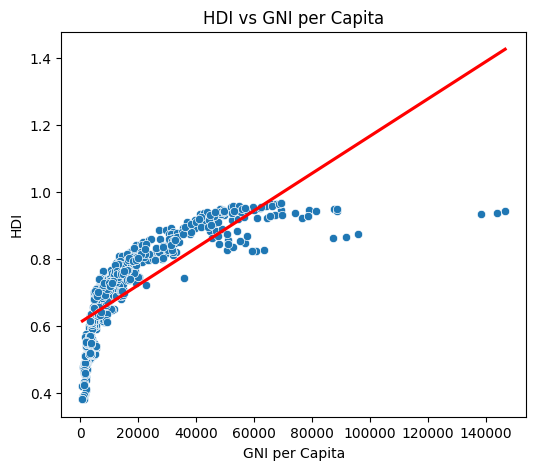

In [ ]:
# Scatter Plot: HDI vs GNI per Capita

plt.figure(figsize=(6,5))

# Main scatter plot
sns.scatterplot(data=hdi_2020_2022_df, x='gross_inc_percap', y='hdi')

# Regression line (optional )
sns.regplot(data=hdi_2020_2022_df, x='gross_inc_percap', y='hdi', scatter=False,ci=None,color='red')

# Titles and labels
plt.title('HDI vs GNI per Capita')
plt.xlabel('GNI per Capita')
plt.ylabel('HDI')

plt.show()


#Problem 2

#Advanced HDI Exploration (South Asian countries)

#Creating South Asia Subset:

In [33]:
# List of South Asian countries
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter the HDI dataset to include only these countries
south_asia_df = hdi[hdi['country'].isin(south_asia)].copy() # we did .copy() removes warnings,ensures your new columns (like Composite Score) are safely added

# Save the filtered dataset as a CSV file
south_asia_df.to_csv('HDI_SouthAsia.csv', index=False)


#Composite Development Score:

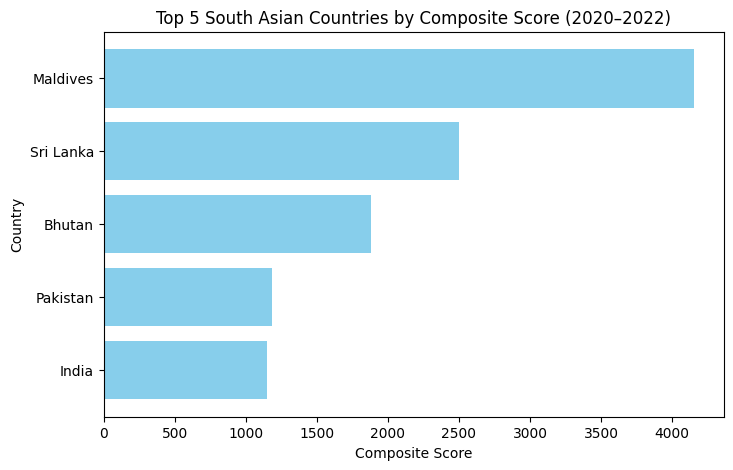

In [34]:
# Create Composite Score for each row
south_asia_df['Composite Score'] = 0.3 * south_asia_df['life_expectancy'] + 0.3 * south_asia_df['gross_inc_percap']

# Compute average Composite Score per country
average_scores = south_asia_df.groupby('country')['Composite Score'].mean()

# Sort countries by Composite Score in descending order
sorted_scores = average_scores.sort_values(ascending=False)

# it Select top 5 countries
top5_countries = sorted_scores.head(5)

# Plot horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(top5_countries.index, top5_countries.values, color='skyblue')
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score (2020–2022)")
plt.gca().invert_yaxis()  # Highest score at the top
plt.show()


In [35]:
top5 = (south_asia_df.groupby('country')['Composite Score'].mean().sort_values(ascending=False).head(5))

print(top5)


country
Maldives     4154.252676
Sri Lanka    2502.612949
Bhutan       1878.321569
Pakistan     1184.282350
India        1151.101140
Name: Composite Score, dtype: float64


#OUTLIER DETECTION (IQR)

**Find IQR for HDI and GNI per capita**

In [36]:
hdi_Q1 = south_asia_df['hdi'].quantile(0.25)
hdi_Q3 = south_asia_df['hdi'].quantile(0.75)
hdi_IQR = hdi_Q3 - hdi_Q1

hdi_lower = hdi_Q1 - 1.5 * hdi_IQR
hdi_upper = hdi_Q3 + 1.5 * hdi_IQR


gni_Q1 = south_asia_df['gross_inc_percap'].quantile(0.25)
gni_Q3 = south_asia_df['gross_inc_percap'].quantile(0.75)
gni_IQR = gni_Q3 - gni_Q1

gni_lower = gni_Q1 - 1.5 * gni_IQR
gni_upper = gni_Q3 + 1.5 * gni_IQR

**Apply outlier detection**

In [37]:
outliers = south_asia_df[
    (south_asia_df['hdi'] < hdi_lower) | (south_asia_df['hdi'] > hdi_upper) |
    (south_asia_df['gross_inc_percap'] < gni_lower) | (south_asia_df['gross_inc_percap'] > gni_upper)
]


In [38]:
outliers_unique = outliers.drop_duplicates(subset='country')

**Creating a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.**

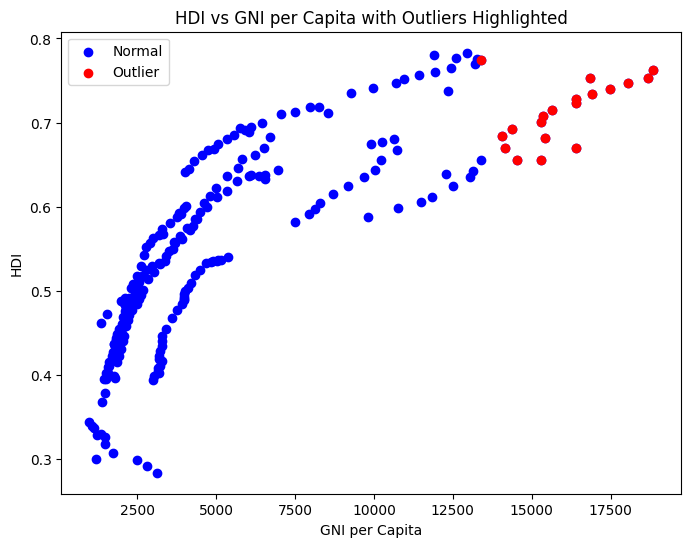

Outlier countries (one row per country):
        country    hdi  gross_inc_percap
3511   Maldives  0.655       14543.14634
5473  Sri Lanka  0.774       13405.80369


In [39]:
plt.figure(figsize=(8,6))
plt.scatter(south_asia_df['gross_inc_percap'], south_asia_df['hdi'], color='blue', label='Normal')
plt.scatter(outliers['gross_inc_percap'], outliers['hdi'], color='red', label='Outlier')
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita with Outliers Highlighted")
plt.legend()
plt.show()

# Step 5: Print only one row per outlier country
print("Outlier countries (one row per country):")
print(outliers_unique[['country', 'hdi', 'gross_inc_percap']])

#Exploring Metric Relationships:

**Pearson Correlation with HDI and Selecting two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life expectancy"}).**

In [40]:
gender_corr = hdi_2022_df['gender_development'].corr(hdi_2022_df['hdi'])
life_corr = hdi_2022_df['life_expectancy'].corr(hdi_2022_df['hdi'])

gender_corr, life_corr


(np.float64(0.6271092979108109), np.float64(0.9002797923151391))

**Scatter Plot + Trendline (Gender Development vs HDI)**

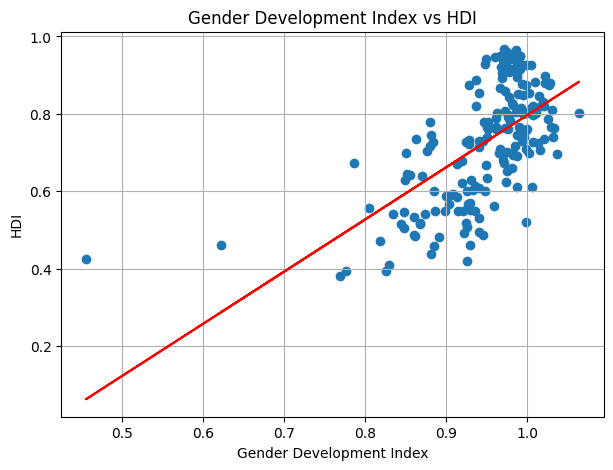

In [41]:
plt.figure(figsize=(7,5))
plt.scatter(hdi_2022_df['gender_development'], hdi_2022_df['hdi'])

# Trendline
# Drop NaN values specifically for the polyfit calculation
clean_data = hdi_2022_df.dropna(subset=['gender_development', 'hdi'])
z = np.polyfit(clean_data['gender_development'], clean_data['hdi'], 1)
p = np.poly1d(z)
plt.plot(clean_data['gender_development'], p(clean_data['gender_development']), color='red')

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("Gender Development Index vs HDI")
plt.grid(True)
plt.show()


**Scatter Plot + Trendline (Life Expectancy vs HDI)**

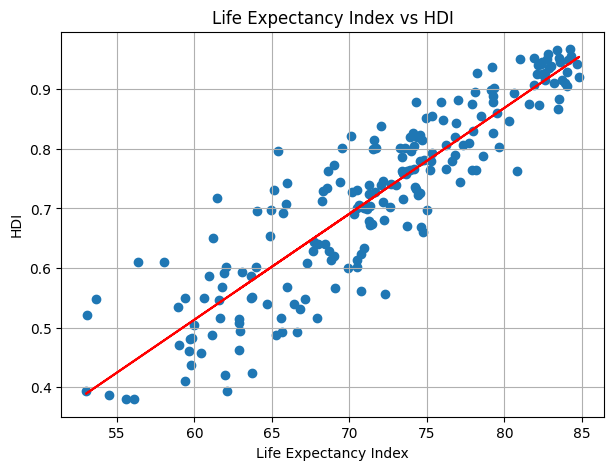

In [42]:
plt.figure(figsize=(7,5))
plt.scatter(hdi_2022_df['life_expectancy'], hdi_2022_df['hdi'])

# Trendline
z = np.polyfit(hdi_2022_df['life_expectancy'], hdi_2022_df['hdi'], 1)
p = np.poly1d(z)
plt.plot(hdi_2022_df['life_expectancy'], p(hdi_2022_df['life_expectancy']), color='red')

plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("Life Expectancy Index vs HDI")
plt.grid(True)
plt.show()

#Gap Analysis:

**Create GNI–HDI Gap Metric**

In [43]:
hdi_2022_df['GNI_HDI_Gap'] = hdi_2022_df['gross_inc_percap'] - hdi_2022_df['hdi']

**Filter South Asian Countries**

In [44]:
south_asia = ['Nepal', 'India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Bhutan', 'Maldives', 'Afghanistan']

south_asia_df = hdi_2022_df[hdi_2022_df['country'].isin(south_asia)]


**Rank by Gap (Descending & Ascending)**

In [45]:
south_asia_sorted_desc = south_asia_df.sort_values('GNI_HDI_Gap', ascending=False)
south_asia_sorted_asc = south_asia_df.sort_values('GNI_HDI_Gap', ascending=True)

south_asia_sorted_desc[['country', 'GNI_HDI_Gap']]


,country,GNI_HDI_Gap
106,Maldives,18846.030190
165,Sri Lanka,11898.718470
19,Bhutan,10624.192880
77,India,6949.882798
13,Bangladesh,6510.452178
132,Pakistan,5373.730423
123,Nepal,4024.953685
0,Afghanistan,1334.743733


**Plot Top 3 Positive & Negative Gaps**

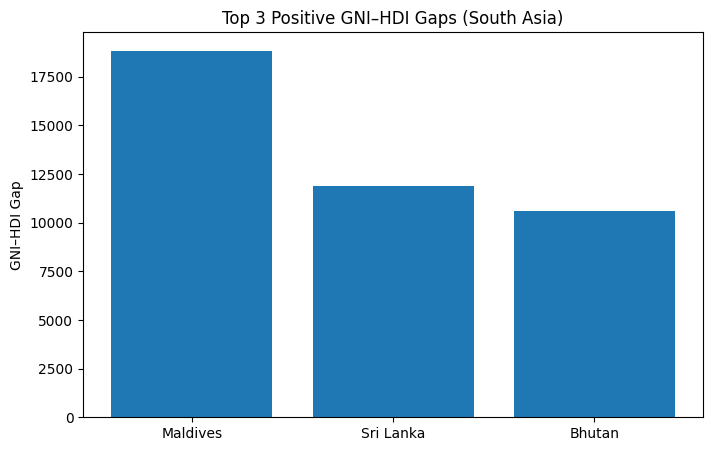

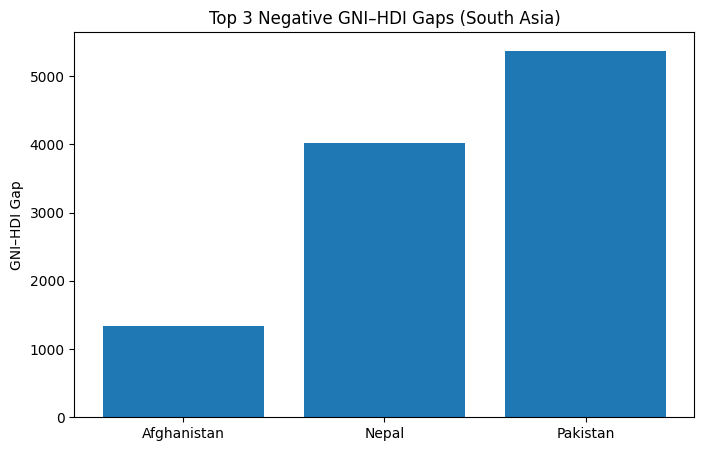

In [46]:
top_positive = south_asia_sorted_desc.head(3)
top_negative = south_asia_sorted_asc.head(3)

plt.figure(figsize=(8,5))
plt.bar(top_positive['country'], top_positive['GNI_HDI_Gap'])
plt.title("Top 3 Positive GNI–HDI Gaps (South Asia)")
plt.ylabel("GNI–HDI Gap")
plt.show()

plt.figure(figsize=(8,5))
plt.bar(top_negative['country'], top_negative['GNI_HDI_Gap'])
plt.title("Top 3 Negative GNI–HDI Gaps (South Asia)")
plt.ylabel("GNI–HDI Gap")
plt.show()


#Problem 3

#Comparative Regional Analysis: South Asia vs Middle East

TASKS:

# 1) Create Middle East Subset:

In [49]:
# list of Middle East countries
middle_east_countries = [
    "Bahrain",
    "Iran",
    "Iraq",
    "Israel",
    "Jordan",
    "Kuwait",
    "Lebanon",
    "Oman",
    "Palestine",
    "Qatar",
    "Saudi Arabia",
    "Syria",
    "United Arab Emirates",
    "Yemen"
]


**Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and
Middle East.**

In [53]:
# Filter dataset for South Asia
south_asia_df = hdi[hdi['country'].isin(south_asia)].copy()
# Filter dataset for Middle East
middle_east_df = hdi[hdi['country'].isin(middle_east_countries)].copy()


**Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for
use in subsequent tasks.**

In [55]:
# Save South Asia subset
south_asia_df.to_csv('HDI_SouthAsia_2020_2022.csv', index=False)

# Save Middle East subset
middle_east_df.to_csv('HDI_MiddleEast_2020_2022.csv', index=False)


# 2) Descriptive Statistics:

**Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020–2022.**

**South Asia (2020–2022)**

In [58]:
# Mean HDI for South Asia
south_asia_mean = south_asia_df['hdi'].mean()

# Standard deviation of HDI for South Asia
south_asia_std = south_asia_df['hdi'].std()

print("South Asia HDI Mean:", south_asia_mean)
print("South Asia HDI Standard Deviation:", south_asia_std)



South Asia HDI Mean: 0.5516485355648535
South Asia HDI Standard Deviation: 0.11975195787924992


**Middle East (2020–2022)**

In [60]:
# Mean HDI for Middle East
middle_east_mean = middle_east_df['hdi'].mean()

# Standard deviation of HDI for Middle East
middle_east_std = middle_east_df['hdi'].std()

print("Middle East HDI Mean:", middle_east_mean)
print("Middle East HDI Standard Deviation:", middle_east_std)


Middle East HDI Mean: 0.7391035502958581
Middle East HDI Standard Deviation: 0.12948168042620165


**Identify which region performs better on average.**

In [61]:
if middle_east_mean > south_asia_mean:
    print("\nMiddle East performs better on average based on HDI.")
else:
    print("\nSouth Asia performs better on average based on HDI.")



Middle East performs better on average based on HDI.


# 3) Top and Bottom Performers:

**i) Identify the top 3 and bottom 3 countries in each region based on HDI.**

**South-Asia**

In [64]:
# Top 3 South Asia countries by HDI
south_asia_top3 = (south_asia_df.groupby('country')['hdi'].mean().sort_values(ascending=False).head(3))

# Bottom 3 South Asia countries by HDI
south_asia_bottom3 = (south_asia_df.groupby('country')['hdi'].mean().sort_values().head(3))

print("South Asia Top 3:\n", south_asia_top3)
print("\nSouth Asia Bottom 3:\n", south_asia_bottom3)


South Asia Top 3:
 country
Sri Lanka    0.715606
Maldives     0.682500
Bhutan       0.634538
Name: hdi, dtype: float64

South Asia Bottom 3:
 country
Afghanistan    0.401030
Pakistan       0.472545
Nepal          0.504242
Name: hdi, dtype: float64


**Middle-East**

In [65]:
# Top 3 Middle East countries by HDI
middle_east_top3 = (middle_east_df.groupby('country')['hdi'].mean().sort_values(ascending=False).head(3))

# Bottom 3 Middle East countries by HDI
middle_east_bottom3 = (middle_east_df.groupby('country')['hdi'].mean().sort_values().head(3))

print("\nMiddle East Top 3:\n", middle_east_top3)
print("\nMiddle East Bottom 3:\n", middle_east_bottom3)



Middle East Top 3:
 country
Israel                  0.858818
United Arab Emirates    0.821273
Qatar                   0.818333
Name: hdi, dtype: float64

Middle East Bottom 3:
 country
Yemen     0.439303
Iraq      0.597970
Jordan    0.702455
Name: hdi, dtype: float64


**ii) Create a bar chart comparing these top and bottom performers across the two regions.**

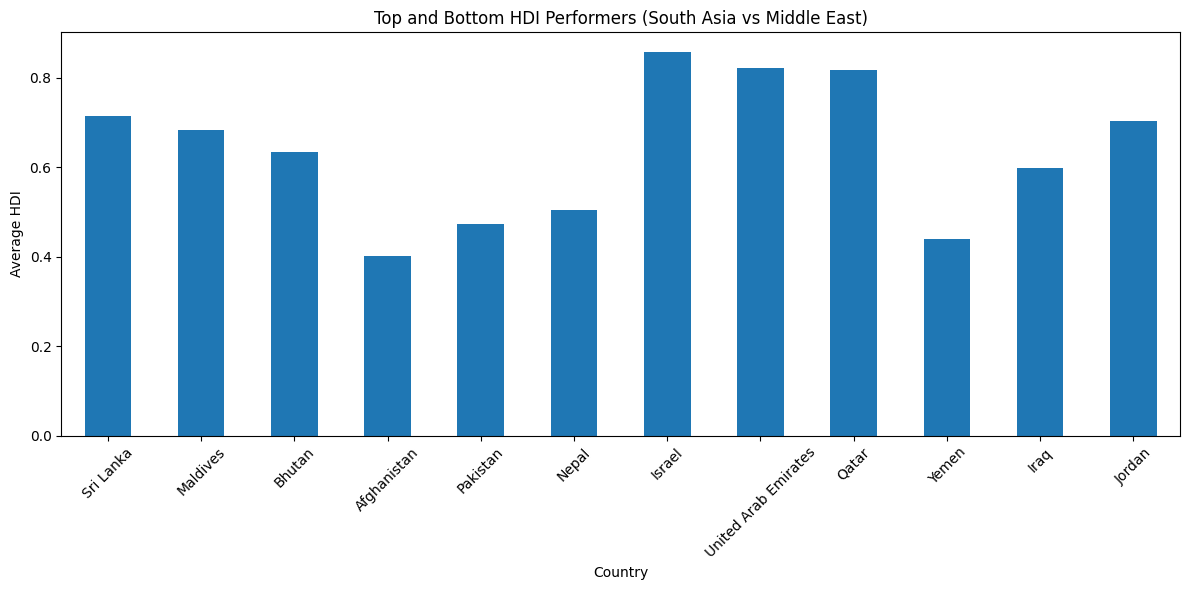

In [69]:
# Combine all results into one DataFrame
plot_data = pd.concat([south_asia_top3,south_asia_bottom3,middle_east_top3,middle_east_bottom3])

# a bigger figure so labels do not overlap
plt.figure(figsize=(12, 6))

# Plot bar chart
plot_data.plot(kind='bar')

# Add titles and labels
plt.title("Top and Bottom HDI Performers (South Asia vs Middle East)")
plt.xlabel("Country")
plt.ylabel("Average HDI")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust layout to avoid overlapping text
plt.tight_layout()

# Show plot
plt.show()


# 4) Metric Comparisons:

**i) Compare the following metrics across regions using grouped bar charts:
– Gender Development Index {"gender development"}
– Life Expectancy Index {"life expectancy"}
– GNI per Capita Index {"gross inc percap"}**

calculating average

In [72]:
# South Asia averages
sa_gender = south_asia_df['gender_development'].mean()
sa_life = south_asia_df['life_expectancy'].mean()
sa_gni = south_asia_df['gross_inc_percap'].mean()

# Middle East averages
me_gender = middle_east_df['gender_development'].mean()
me_life = middle_east_df['life_expectancy'].mean()
me_gni = middle_east_df['gross_inc_percap'].mean()



storing values for plotting

In [73]:
metrics = ['Gender Development', 'Life Expectancy', 'GNI per Capita']
south_asia_values = [sa_gender, sa_life, sa_gni]
middle_east_values = [me_gender, me_life, me_gni]


**Grouped bar chart**

**Gender Development Index**

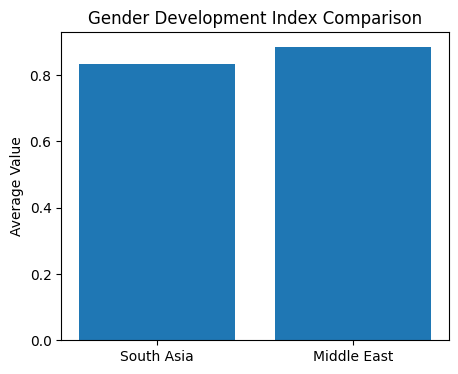

In [79]:
plt.figure(figsize=(5,4))
plt.bar(['South Asia', 'Middle East'], [sa_gender, me_gender])
plt.title('Gender Development Index Comparison')
plt.ylabel('Average Value')
plt.show()


**Life Expectancy Index**

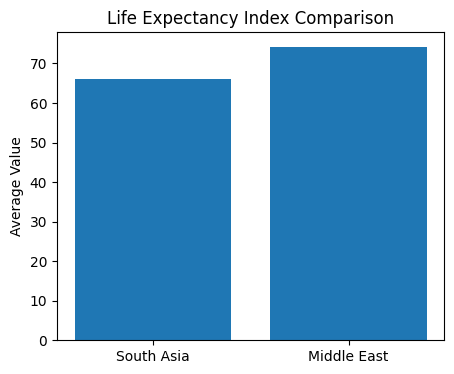

In [80]:
plt.figure(figsize=(5,4))
plt.bar(['South Asia', 'Middle East'], [sa_life, me_life])
plt.title('Life Expectancy Index Comparison')
plt.ylabel('Average Value')
plt.show()


#GNI per Capita Index

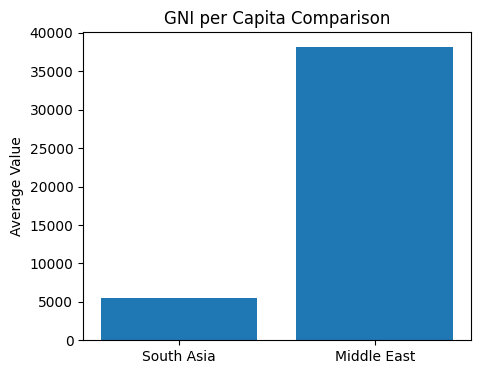

In [81]:
plt.figure(figsize=(5,4))
plt.bar(['South Asia', 'Middle East'], [sa_gni, me_gni])
plt.title('GNI per Capita Comparison')
plt.ylabel('Average Value')
plt.show()


The grouped bar charts show that the Middle East has higher average values than South Asia across all three metrics. The largest disparity is observed in GNI per Capita, indicating a significant economic gap between the regions

# 5) HDI Disparity:

**Compute the range (max – min) of HDI for each region.**

South Asia

In [82]:
sa_hdi_range = south_asia_df['hdi'].max() - south_asia_df['hdi'].min()


Middle East

In [83]:
me_hdi_range = middle_east_df['hdi'].max() - middle_east_df['hdi'].min()


**Compute the coefficient of variation (CV = std/mean) for HDI.**

In [87]:
#Coefficient of Variation (CV) = standard deviation / mean
# SOUTH-ASIA
sa_hdi_cv = south_asia_df['hdi'].std() / south_asia_df['hdi'].mean()
print("South Asia HDI Range:", sa_hdi_range)
print("South Asia HDI CV:", sa_hdi_cv)





South Asia HDI Range: 0.49900000000000005
South Asia HDI CV: 0.21708016999742674


In [86]:
#MIDDLE-EAST
me_hdi_cv = middle_east_df['hdi'].std() / middle_east_df['hdi'].mean()
print("Middle East HDI Range:", me_hdi_range)
print("Middle East HDI CV:", me_hdi_cv)


Middle East HDI Range: 0.5800000000000001
Middle East HDI CV: 0.1751874691636524


Higher range → more spread

Higher CV → more relative variation

Based on both the HDI range and coefficient of variation, South Asia exhibits greater variation in HDI compared to the Middle East, indicating wider development differences among its countries.

# 6) Correlation Analysis:

**i) For each region, compute correlations of HDI with:
– Gender Development Index
– Life Expectancy Index**

**South Asia correlations**

In [90]:
sa_corr_gender = south_asia_df['hdi'].corr(south_asia_df['gender_development'])
sa_corr_life = south_asia_df['hdi'].corr(south_asia_df['life_expectancy'])
print("South Asia HDI vs Gender Development:", sa_corr_gender)
print("South Asia HDI vs Life Expectancy:", sa_corr_life)


South Asia HDI vs Gender Development: 0.8656210050127539
South Asia HDI vs Life Expectancy: 0.9587610559043978


**Middle East correlations**

In [91]:
me_corr_gender = middle_east_df['hdi'].corr(middle_east_df['gender_development'])
me_corr_life = middle_east_df['hdi'].corr(middle_east_df['life_expectancy'])
print("Middle East HDI vs Gender Development:", me_corr_gender)
print("Middle East HDI vs Life Expectancy:", me_corr_life)


Middle East HDI vs Gender Development: 0.9310815015552354
Middle East HDI vs Life Expectancy: 0.9430019629101669


**ii) Scatter plots with trendlines**

**South Asia: HDI vs Gender Development**

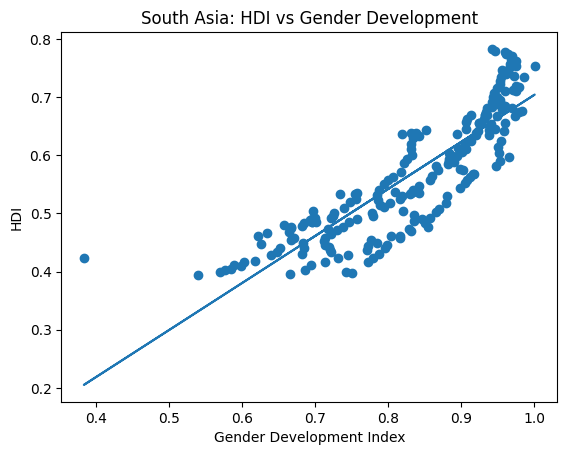

In [97]:
df = south_asia_df[['gender_development', 'hdi']].dropna()

x = df['gender_development']
y = df['hdi']

plt.scatter(x, y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.title('South Asia: HDI vs Gender Development')
plt.show()


**South Asia: HDI vs Life Expectancy**

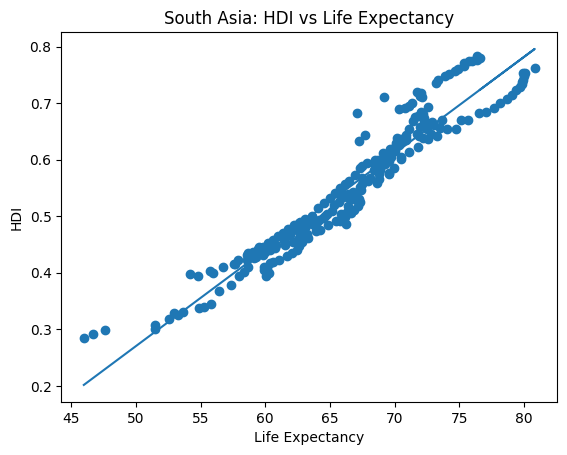

In [98]:
df = south_asia_df[['life_expectancy', 'hdi']].dropna()

x = df['life_expectancy']
y = df['hdi']

plt.scatter(x, y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel('Life Expectancy')
plt.ylabel('HDI')
plt.title('South Asia: HDI vs Life Expectancy')
plt.show()


**Middle East: HDI vs Gender Development**

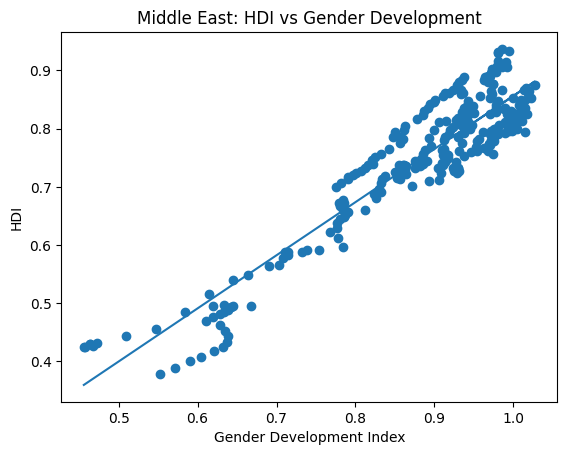

In [100]:
df = middle_east_df[['gender_development', 'hdi']].dropna()

x = df['gender_development']
y = df['hdi']

plt.scatter(x, y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.title('Middle East: HDI vs Gender Development')
plt.show()


**Middle East: HDI vs Life Expectancy**

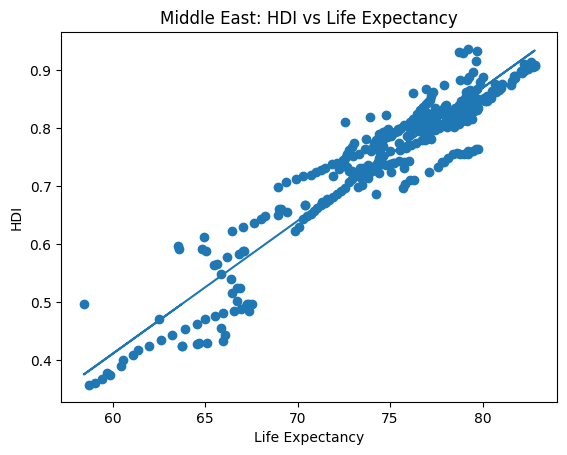

In [102]:
df = middle_east_df[['life_expectancy', 'hdi']].dropna()

x = df['life_expectancy']
y = df['hdi']

plt.scatter(x, y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel('Life Expectancy')
plt.ylabel('HDI')
plt.title('Middle East: HDI vs Life Expectancy')
plt.show()


The correlation analysis shows a positive relationship between HDI and both Gender Development Index and Life Expectancy in South Asia and the Middle East. This indicates that countries with higher gender development and better health outcomes tend to have higher human development levels. The relationship with life expectancy appears stronger, suggesting health plays a key role in overall development.

# 7) Outlier Detection:

Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using
the 1.5 × IQR rule.

**Simple function to detect outliers**

In [108]:
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return (series < lower) | (series > upper)


**Scatter plot with outliers highlighted**

Normal points → blue

Outliers → red

**SOUTH ASIA — HDI vs GNI**

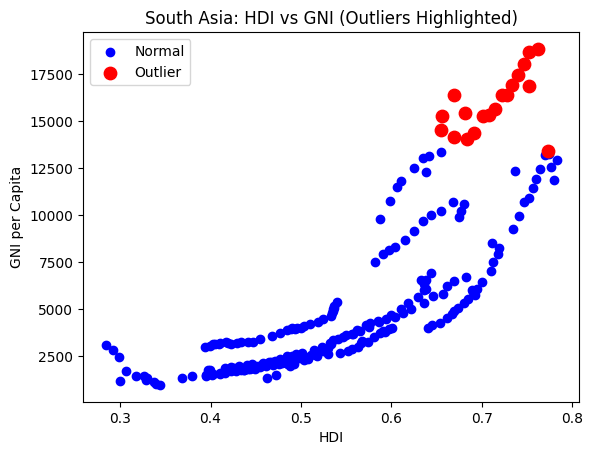

In [109]:
import matplotlib.pyplot as plt

# Detect outliers in BOTH variables
hdi_outliers = find_outliers(south_asia_df['hdi'])
gni_outliers = find_outliers(south_asia_df['gross_inc_percap'])

# Combine outliers (either HDI or GNI)
outliers = hdi_outliers | gni_outliers

# Plot normal points FIRST (blue)
plt.scatter(
    south_asia_df.loc[~outliers, 'hdi'],
    south_asia_df.loc[~outliers, 'gross_inc_percap'],
    color='blue',
    label='Normal'
)

# Plot outliers SECOND (red, bigger)
plt.scatter(
    south_asia_df.loc[outliers, 'hdi'],
    south_asia_df.loc[outliers, 'gross_inc_percap'],
    color='red',
    label='Outlier',
    s=80
)

plt.xlabel('HDI')
plt.ylabel('GNI per Capita')
plt.title('South Asia: HDI vs GNI (Outliers Highlighted)')
plt.legend()
plt.show()


**MIDDLE EAST — HDI vs GNI**

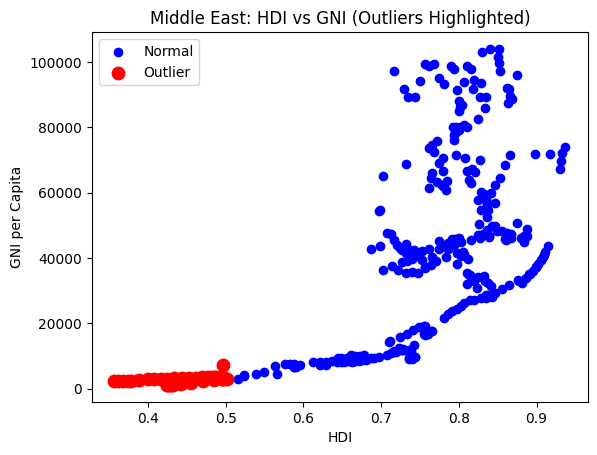

In [110]:
hdi_outliers = find_outliers(middle_east_df['hdi'])
gni_outliers = find_outliers(middle_east_df['gross_inc_percap'])

outliers = hdi_outliers | gni_outliers

plt.scatter(
    middle_east_df.loc[~outliers, 'hdi'],
    middle_east_df.loc[~outliers, 'gross_inc_percap'],
    color='blue',
    label='Normal'
)

plt.scatter(
    middle_east_df.loc[outliers, 'hdi'],
    middle_east_df.loc[outliers, 'gross_inc_percap'],
    color='red',
    label='Outlier',
    s=80
)

plt.xlabel('HDI')
plt.ylabel('GNI per Capita')
plt.title('Middle East: HDI vs GNI (Outliers Highlighted)')
plt.legend()
plt.show()
